### Binary classification on titanic problem

#### Importing Libraries
Imported necessary libraries and url for data

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
url="https://raw.githubusercontent.com/lumidenoir/Project2022/assignment/Applications_Of_Reinforcement_Learning/Assignment-3/210299_krishna%20dantu/"

#### Basic functions:

In [249]:
def normalise(matrix):
    factor1=matrix.min()
    factor2=matrix.max()-matrix.min()
    matrix_nor = (matrix-factor1)/factor2
    return matrix_nor,factor1,factor2

def concate(matrix):
    matrix=np.concatenate((np.ones((matrix.shape[0],1)),matrix), axis=1)
    return matrix

#### sigmoid function:

In [250]:
def sigmoid(Z):
    sig=1/(1+np.exp(-Z))
    return sig

#### Cost and Gradient descent functions:
improvised the functions for both the methods.

In [251]:
def costfunction(X,y,theta,type):
    ypre=X.dot(theta.T)
    if type=='lin':
        sqr_error=(ypre-y)**2
        sumofsquares=np.sum(sqr_error)
        return (1/2*X.shape[0])*sumofsquares
    elif type=='sig':
        term1=-y*(np.log(sigmoid(ypre)))
        term2=-(1-y)*np.log(1-sigmoid(ypre))
        return (1/X.shape[0])*np.sum(term1+term2)

def gradientdescent(X,y,theta,cycle,alpha,type):
    cost = np.zeros(cycle)
    for i in range(cycle):
        if type=='lin':
            error=((X.dot(theta.T))-y)
        elif type=='sig':
            error=(sigmoid(X@theta.T)-y)
        multiplyerror = (error.T@X)
        theta = theta-(alpha/X.shape[1])*multiplyerror
        cost[i] = costfunction(X, y, theta,type)
    return theta,cost

##### prediction function:
prediction now possible for both methods.

In [252]:
def Predict(X,theta,type):
    if type=='lin':
        y_predict=X.dot(theta.T)
    elif type=='sig':
        y_predict=X.dot(theta.T)
        for i in range(y_predict.shape[0]):
         if y_predict[i,0]<0:
            y_predict[i,0]=0
         elif y_predict[i,0]>0:
            y_predict[i,0]=1
    return y_predict

#### Function for filling missing values of age:
datasets having missing values can be filled using various methods:
- replacing missing values with arbitariry values.
- replacing missing values with mean, median and mode.
- interpolating the data.
- using multivariate regression on other categories to calculate the missing values.
- etc...

Here I used mutivariate linear regression on `Pclass`, `Sex`, `SibSp`, `Parch`, `Fare` to get `Age`.

In [253]:
def fill_age(url, dataset):
    if dataset=='train':
        labels=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
        col=3
    elif dataset=='test':
        labels=['Pclass','Sex','Age','SibSp','Parch','Fare']
        col=2
    data=pd.read_csv(url, skipinitialspace=True, usecols=labels)#url
    data['Sex'].replace(['male','female'],[1,0],inplace=True)
    cycle=5000
    dep_data=data.dropna(axis=0)
    dep_data_reg=dep_data.loc[:,['Pclass','Sex','SibSp','Parch','Fare']].values
    dep_data_age=dep_data.loc[:,['Age']].values
    theta=np.zeros((1,dep_data_reg.shape[1]+1))
    data_reg_nor,fac1,fac2=normalise(dep_data_reg)
    data_reg_nor=concate(data_reg_nor)
    theta1, cost=gradientdescent(data_reg_nor,dep_data_age,theta,cycle,0.01,'lin')
    for i in range(data.shape[0]):
        if math.isnan(data.iloc[i,col]):
            data_dep=data.loc[i:i+1,['Pclass','Sex','SibSp','Parch','Fare']].values
            data_dep=(data_dep-fac1)/fac2
            data_dep=concate(data_dep)
            data.iloc[i,col]=Predict(data_dep,theta1,'lin')[0,0]
    
    return data

#### Training data:
Here the number of cycle used is only 100 because using higher epochs the model is over-fitting the hypothesis equation.

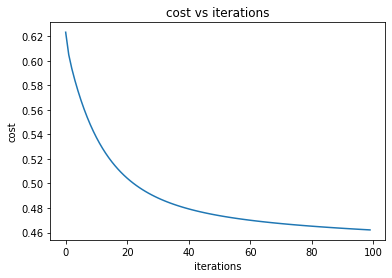

In [254]:
train_data=fill_age(url+"train.csv",'train')#age fill using mutivariate linear regression
data_cat=train_data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare']]
data_survive=train_data.loc[:,['Survived']]
theta=np.array([[0,0,0,0,0,0,0]])
data_cat,fac1,fac2=normalise(data_cat)
data_cat=concate(data_cat)
theta,cost2=gradientdescent(data_cat,data_survive,theta,100,0.01,'sig')
survive_predict=Predict(data_cat,theta,'sig')

plt.plot(range(100),cost2)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iterations")
plt.show()

#### Predicting survival for test data:

In [255]:
test_data=fill_age(url+"test.csv",'test')
test_cat=test_data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare']].values
test_cat=(test_cat-np.array(fac1))/np.array(fac2)
test_cat=concate(test_cat)
test_predict=Predict(test_cat,theta,'sig')

#### Calculating accuracy:

In [256]:
df=pd.read_csv(url+"gender_submission.csv",skipinitialspace=True, usecols=['Survived']).values
print("Accuracy of model is",sum(test_predict==df)/len(df))

Accuracy of model is [0.99760766]


#### task 2 prediction:
assumed pclass of arpit to be 3 and shreya as 1

In [259]:
query_arpit=concate((np.array([[3,1,20,0,0,7.5]])-np.array(fac1))/np.array(fac2))
query_shreya=concate((np.array([[1,0,19,1,1,512]])-np.array(fac1))/np.array(fac2))
qa=Predict(query_arpit,theta,'sig')
qs=Predict(query_shreya,theta,'sig')
print("survival of arpit and shreya are",qa[0,0],"and",qs[0,0],"repectively")

survival of arpit and shreya are 0.0 and 1.0 repectively
